<a href="https://colab.research.google.com/github/Anshul007/PyTorch-for-deep-learning-in-a-day/blob/main/Daniel_Bourke_Lecture_01_2_Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Best video for building neural net from scratch
https://www.youtube.com/watch?v=w8yWXqWQYmU

# PyTorch Workflow

> PyTorch workflow end-to-end

In [ ]:
import numpy as np
from torch import nn

import torch

In [ ]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

In [ ]:
# def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
#     one_hot_Y = one_hot(Y)
#     dZ2 = A2 - one_hot_Y
#     dW2 = 1 / m * dZ2.dot(A1.T)
#     db2 = 1 / m * np.sum(dZ2)
#     dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
#     dW1 = 1 / m * dZ1.dot(X.T)
#     db1 = 1 / m * np.sum(dZ1)
#     return dW1, db1, dW2, db2

# Creating Data for linear Regression

In [ ]:
# create *known* parameters
weight = 0.7
bias = 0.3

# create data
start = 0
end = 1
step = 0.02

X= torch.arange(start,end,step).unsqueeze(dim=1)
y = bias + weight * X

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into training and testing

In [ ]:
train_split = int(.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
import matplotlib
%matplotlib inline

from matplotlib import pyplot as plt

> Visualizing the data

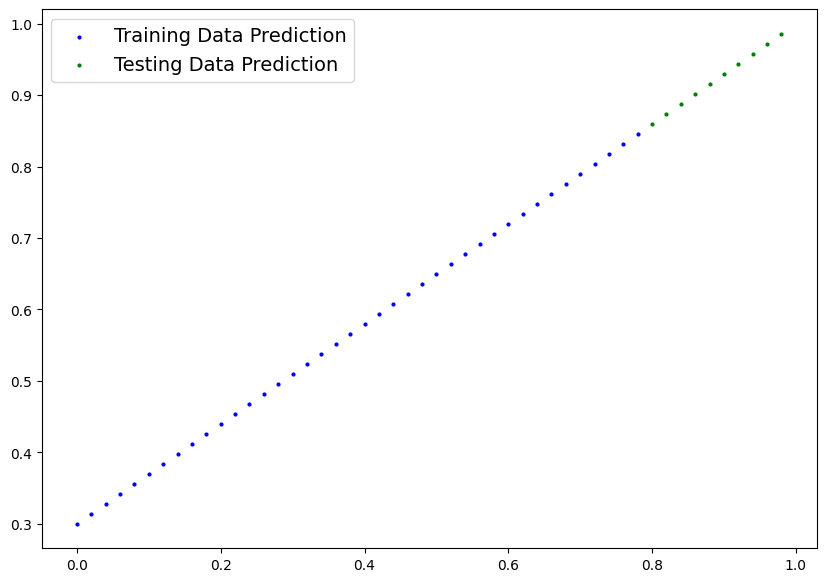

In [ ]:
def plot_prediction(train_data = X_train,
                    train_labels = y_train,
                    test_data= X_test,
                    test_labels= y_test,
                    prediction= None):
  # plotting training and testing data and compare prediction
  plt.figure(figsize= (10,7))
  plt.scatter(train_data, train_labels,c="b" ,s=4, label= "Training Data Prediction")

  plt.scatter(test_data, test_labels,c="g",s=4, label= "Testing Data Prediction")

  # plot prediction
  if prediction is not None:
    plt.scatter(test_data, prediction, c="r", s=4, label= "Predictions")

  plt.legend(prop= {"size" : 14})

# calling the visualization function
plot_prediction()

## Building Model
> Busing our first pytorch model

In [ ]:
# create linear regression model class
class LinearRegression(nn.Module):

  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype= float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad= True,
                                         dtype = float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.tensor):
    return self.bias + self.weight * x # This is the regression formula

> if you are using the `nn.Module` then we must overrite forward function

### PyTorch model building essentials

* torch.nn - contains all the buildings for computational graphs (aka neural network)
* torch.nn.Parameter - What parameter should our model try and learn.
* torch.nn.Module - The base class for all the neural network models, if you subcalss it you should overrite this.
* torch.optim - This is where the optimizer in PyTorch live. This will help gradient descent.

In [ ]:
## Create a random seed
torch.manual_seed(42)

# instance of the model
model_0 = LinearRegression()

# checking what's inside the object
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367], dtype=torch.float64)),
             ('bias', tensor([0.1288], dtype=torch.float64))])

### Making prediction usinh `torch.infrence_mode()`
 Let's see how well model predict `y_test` based on `X_test`

In [ ]:
with torch.inference_mode(): # inference is aka predictions
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], dtype=torch.float64)

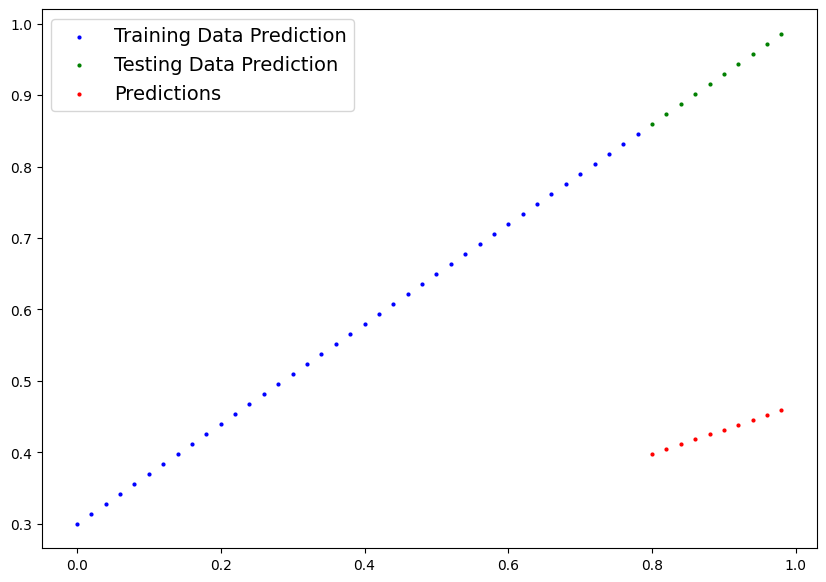

In [ ]:
plot_prediction(prediction= y_preds)

## Training Model


-----
This we need to train
* **Loss function:** How much far model are from the actual values.
* **Optimizer:** Takes into account the models loss and update the model's parameters to improve the loss.

> Lower the loss, better the model is.

In [ ]:
# defining loss function
loss_fnct = nn.L1Loss()
loss_fnct(y_preds,y_test)

# defining optimizer
optimizer = torch.optim.SGD(params= model_0.parameters(),
                            lr= 0.01) # leanring rate

## Building the training loop and testing loop

In [ ]:
# an epoch is one loop through the data
epochs = 1

for epoch in range(epochs):
  # set model to training mode
  model_0.train() # train mode in pytorch set all the parameters that require gradients

  # 1. forward pass
  y_pred = model_0(X_train)

  # 2. calculate loss
  loss = loss_fnct(y_pred, y_train)
  print(f"loss {loss}")

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. perform back propagation
  loss.backward()

  # 5. step the optimizer (to perform the gradient descent)
  optimizer.step()

  # turns off the gradient tracking
  model_0.eval()

  # model's state
  print(model_0.state_dict())

loss 0.31288135683755547
OrderedDict([('weight', tensor([0.3406], dtype=torch.float64)), ('bias', tensor([0.1388], dtype=torch.float64))])


In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3406], dtype=torch.float64)),
             ('bias', tensor([0.1388], dtype=torch.float64))])

In [ ]:
# older version
model_0.state_dict()

OrderedDict([('weight', tensor([0.3406], dtype=torch.float64)),
             ('bias', tensor([0.1388], dtype=torch.float64))])

In [ ]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)

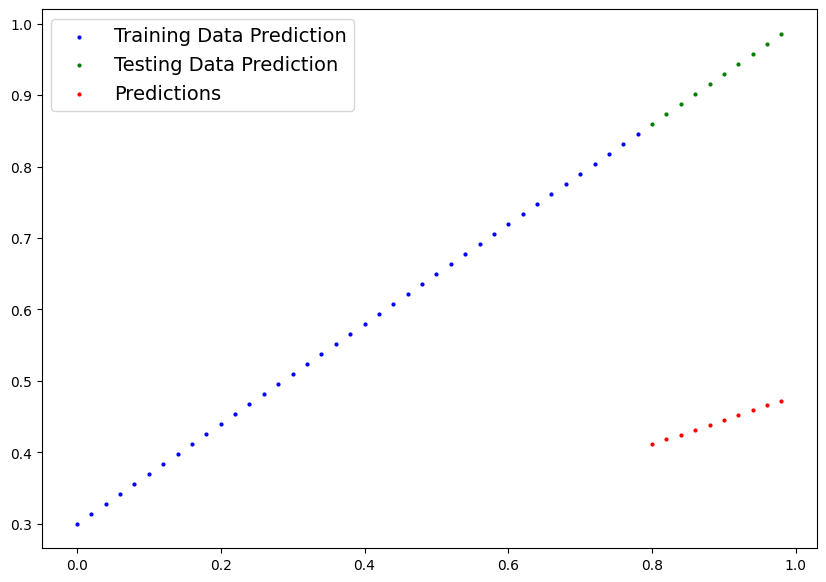

In [ ]:
plot_prediction(prediction= y_pred_new)

### Adding testing code in training loop

In [ ]:
# an epoch is one loop through the data
epochs = 200
epoch_counts = []
train_losses = []
test_losses = []

for epoch in range(epochs):
  # set model to training mode
  model_0.train() # train mode in pytorch set all the parameters that require gradients

  # 1. forward pass
  y_pred = model_0(X_train)

  # 2. calculate loss
  loss = loss_fnct(y_pred, y_train)
  # print(f"loss {loss}")

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. perform back propagation
  loss.backward()

  # 5. step the optimizer (to perform the gradient descent)
  optimizer.step()

  # turns off the gradient tracking
  model_0.eval() # Turns off different setting in the model not needed for evaluation/testing (dropout and batchnorm layer).

  with torch.inference_mode(): # it turns of radient tracking
    # 1. forward pass
    test_pred = model_0(X_test)

    # 2. calculate the loss
    test_loss = loss_fnct(test_pred, y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
    epoch_counts.append(epoch)
    train_losses.append(loss)
    test_losses.append(test_loss)

    # model's state
    print(model_0.state_dict())
    print("--"*20)

Epoch: 0 | Loss: 0.30136035690119084 | Test Loss: 0.4675941841894923
OrderedDict([('weight', tensor([0.3445], dtype=torch.float64)), ('bias', tensor([0.1488], dtype=torch.float64))])
----------------------------------------
Epoch: 10 | Loss: 0.18615035753754472 | Test Loss: 0.3328841845436553
OrderedDict([('weight', tensor([0.3835], dtype=torch.float64)), ('bias', tensor([0.2488], dtype=torch.float64))])
----------------------------------------
Epoch: 20 | Loss: 0.08227578243637819 | Test Loss: 0.2069589848961622
OrderedDict([('weight', tensor([0.4222], dtype=torch.float64)), ('bias', tensor([0.3403], dtype=torch.float64))])
----------------------------------------
Epoch: 30 | Loss: 0.05181942307044729 | Test Loss: 0.14023708522621853
OrderedDict([('weight', tensor([0.4539], dtype=torch.float64)), ('bias', tensor([0.3788], dtype=torch.float64))])
----------------------------------------
Epoch: 40 | Loss: 0.045037931034514214 | Test Loss: 0.1118293854686619
OrderedDict([('weight', tenso

In [ ]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)

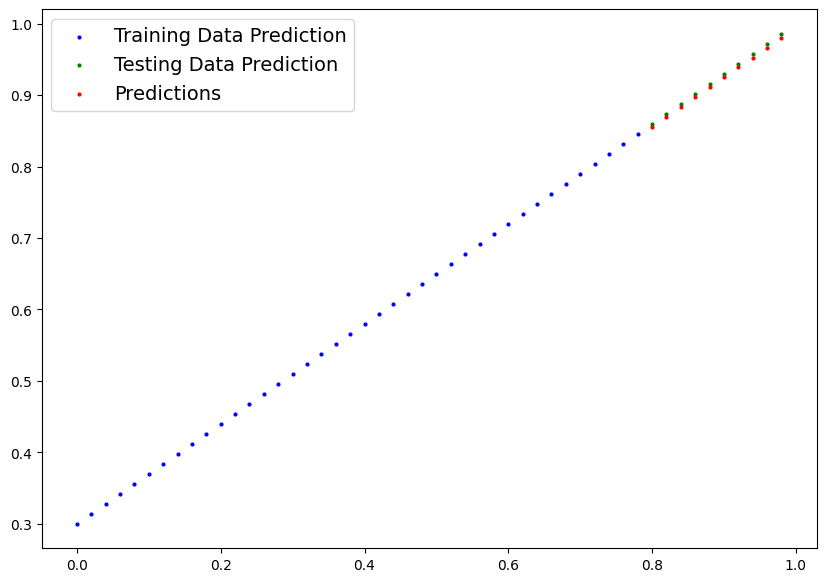

In [ ]:
plot_prediction(prediction= y_pred_new)

In [ ]:
# np.array(torch.tensor(train_losses)) # this also works
list(torch.tensor(train_losses))

[tensor(0.3014, dtype=torch.float64),
 tensor(0.1862, dtype=torch.float64),
 tensor(0.0823, dtype=torch.float64),
 tensor(0.0518, dtype=torch.float64),
 tensor(0.0450, dtype=torch.float64),
 tensor(0.0413, dtype=torch.float64),
 tensor(0.0379, dtype=torch.float64),
 tensor(0.0344, dtype=torch.float64),
 tensor(0.0310, dtype=torch.float64),
 tensor(0.0275, dtype=torch.float64),
 tensor(0.0241, dtype=torch.float64),
 tensor(0.0207, dtype=torch.float64),
 tensor(0.0172, dtype=torch.float64),
 tensor(0.0138, dtype=torch.float64),
 tensor(0.0104, dtype=torch.float64),
 tensor(0.0069, dtype=torch.float64),
 tensor(0.0035, dtype=torch.float64),
 tensor(0.0026, dtype=torch.float64),
 tensor(0.0026, dtype=torch.float64),
 tensor(0.0026, dtype=torch.float64)]

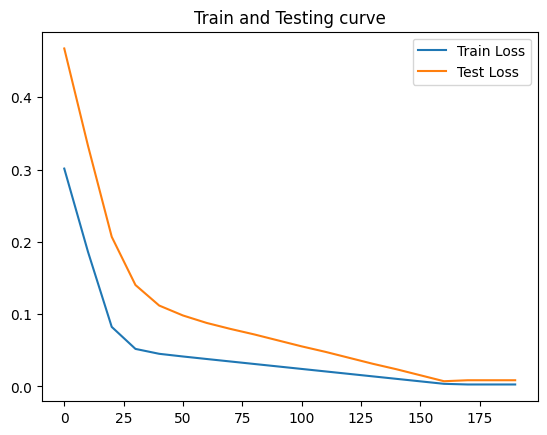

In [ ]:
# plot the loss curve
plt.plot(epoch_counts, np.array(torch.tensor(train_losses)), label= "Train Loss")
plt.plot(epoch_counts, test_losses, label= "Test Loss")
plt.title("Train and Testing curve")
plt.legend()
plt.show()

## Saving a model in PyTorch

1. `torch.save()` - allows you to save a PyTorch object in pyton's pickel format.
2. `torch.load()` - allows you to load already saved model.
3. `torch.nn.Module.load_state_dict()` - This allows to load a model's saved state dictionary.

In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. create model dictonary
model_path = Path("models")
model_path.mkdir(parents= True, exist_ok= True)

# 2. create a model save path
model_name = "02_Pytorch Workflow_model_0.pth"
model_save_path = model_path / model_name

# 3. save the model state dict
print(f"Saving in this location {model_save_path}")
torch.save(obj= model_0.state_dict(), f= model_save_path)

Saving in this location models/02_Pytorch Workflow_model_0.pth


## Loading the model

In [ ]:
# saved_model = torch.load(model_save_path)
# saved_model

In [ ]:
# creating a fresh model's object
model_0_1 = LinearRegression()

print(f"Before {model_0_1.state_dict()}")

# load the save state and check the new state
model_0_1.load_state_dict(torch.load(f=model_save_path))

Before OrderedDict([('weight', tensor([0.2345], dtype=torch.float64)), ('bias', tensor([0.2303], dtype=torch.float64))])


<ipython-input-26-e4d7f2952733>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_0_1.load_state_dict(torch.load(f=model_save_path))


<All keys matched successfully>

In [ ]:
print(f"After {model_0_1.state_dict()}")

After OrderedDict([('weight', tensor([0.6951], dtype=torch.float64)), ('bias', tensor([0.2993], dtype=torch.float64))])


In [ ]:
# now let's make some predictions with new loaded model
model_0_1.eval()
with torch.inference_mode():
  loaded_model_preds = model_0_1(X_test)

loaded_model_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]], dtype=torch.float64)

In [ ]:
# just checking
test_pred == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# 6. Putting it all Together

In [ ]:
import numpy as np
import torch
from torch import nn
from matplotlib import pyplot as plt

torch.__version__

'2.4.1+cu121'

In [ ]:
# creating device acgnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device {device}")

Using device cpu


## 1. Data

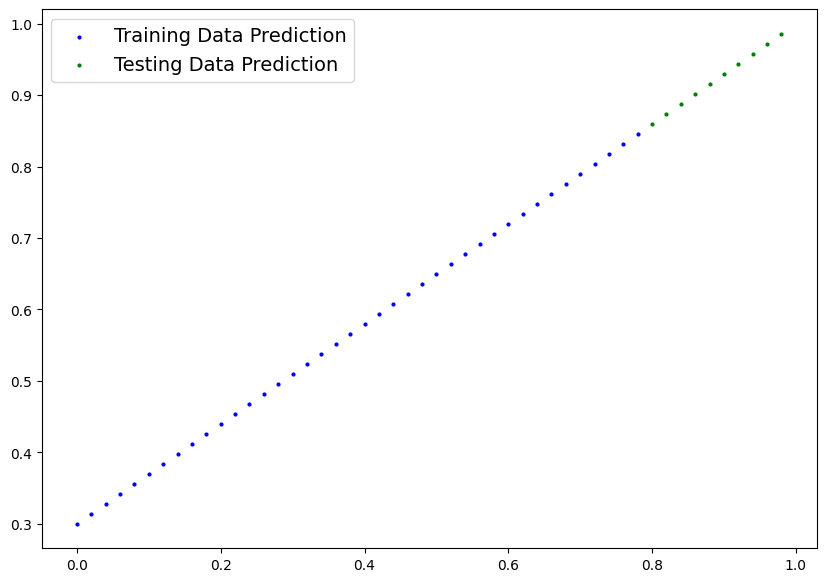

In [ ]:
# create some data using linear regression
weight = 0.7
bias = 0.3

# create a range value
start =0
end= 1
step =0.02

# create X and y
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = bias + weight * X

# plt.plot(X)
# plt.plot(y)

# creating a training and test split
split_pct = int(.8 * len(X))
X_train, y_train = X[:split_pct], y[:split_pct]
X_test, y_test = X[split_pct:],y[split_pct:]

plot_prediction(X_train, y_train, X_test, y_test) # printing the train and test

## 2. Building the PyTorch linear model

In [ ]:
# create a linear model by subclassing nn.Module
class LinearRegression1V2(nn.Module):
  def __init__(self):
    super().__init__()
    weight
    # use nn.Linear() for creating the model's parameter (like weight bias and the linear regreassion formula as well.)
    self.linear_layer = nn.Linear(in_features= 1,
                                  out_features= 1)
  def forward(self, x: torch.tensor):
    return self.linear_layer(x)

# setting manuall seed
torch.manual_seed(42)
# creating model object
model_1 = LinearRegression1V2()
model_1, model_1.state_dict()

(LinearRegression1V2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# check the device
device, next(model_1.parameters()).device

('cpu', device(type='cpu'))

In [ ]:
# if not the same and we wanted to switch the device
model_1.to(device) # to change
next(model_1.parameters()).device # to display

device(type='cpu')

> `When you are dealing with multiple device You have to putt everything one the same device in-order to compute`
----
**Writing device achnostic code for input data.**
* `X_train = X_train.to(device)`
* `y_train = y_train.to(device)`
* `X_test = X_test.to(device)`
* `X_test = X_test.to(device)`


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

## Train the model
for training we need
* Loss Function
* Optimizer
* Training Loop
* Testing Loop

In [ ]:
# setting up loss function
loss_fnct = nn.L1Loss()

# setting up optimizer
optimizer = torch.optim.SGD(params= model_1.parameters(), lr=0.01)

# let's write a training loop
torch.manual_seed(42)
epochs = 200

for epoch in range(epochs):
  model_1.train()
  # 1. forward pass
  train_pred = model_1(X_train)
  # print(train_pred.shape, y_train.shape)
  # 2. calculate the loss
  train_loss = loss_fnct(train_pred, y_train)
  # 3. optimize zero grad
  optimizer.zero_grad()
  # 4. perform backpropagation
  train_loss.backward()
  # 5. optimizer
  optimizer.step()

  #### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fnct(test_pred, y_test)

    # printing out what's happening
    if epoch %10 == 0:
      print(f"epoch : {epoch} | Train Loss : {train_loss} | Test Loss {test_loss}")

epoch : 0 | Train Loss : 0.5551779866218567 | Test Loss 0.5739762187004089
epoch : 10 | Train Loss : 0.4399680495262146 | Test Loss 0.4392663538455963
epoch : 20 | Train Loss : 0.3247582018375397 | Test Loss 0.30455657839775085
epoch : 30 | Train Loss : 0.20954827964305878 | Test Loss 0.16984674334526062
epoch : 40 | Train Loss : 0.09433844685554504 | Test Loss 0.03513689711689949
epoch : 50 | Train Loss : 0.023886386305093765 | Test Loss 0.04784906655550003
epoch : 60 | Train Loss : 0.0199567973613739 | Test Loss 0.04580312222242355
epoch : 70 | Train Loss : 0.016517987474799156 | Test Loss 0.0375305712223053
epoch : 80 | Train Loss : 0.013089170679450035 | Test Loss 0.029944902285933495
epoch : 90 | Train Loss : 0.009653178043663502 | Test Loss 0.02167237363755703
epoch : 100 | Train Loss : 0.006215679459273815 | Test Loss 0.014086711220443249
epoch : 110 | Train Loss : 0.002787243574857712 | Test Loss 0.005814164876937866
epoch : 120 | Train Loss : 0.0012645035749301314 | Test Loss 

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

## Making into evaluation mode
> if we are not training the model instead doing other things like inference making predictions. in that case we should put model into eval mode by `model.eval()`

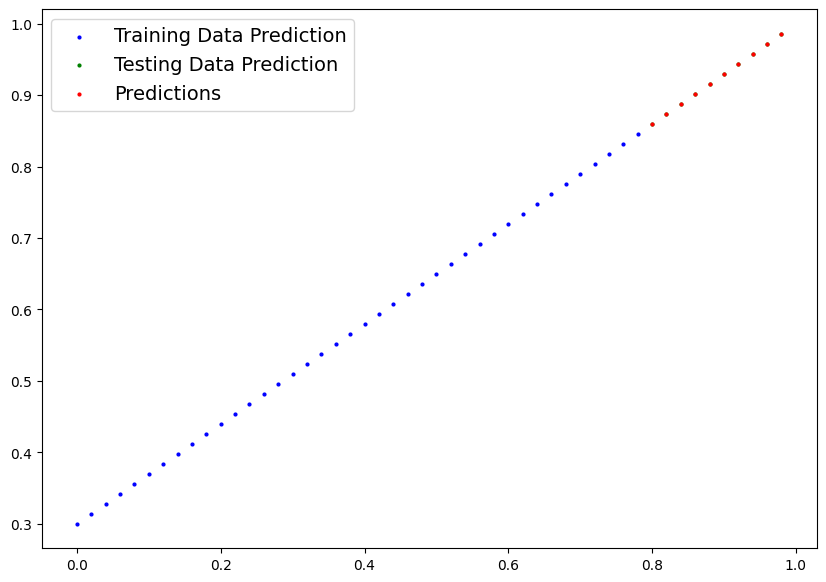

In [ ]:
model_1.eval()
test_prediction = []
# making prediction
with torch.inference_mode():
  test_pred = model_1(X_test)
  test_prediction.append(test_pred)


# plotting predictions
plot_prediction(prediction= test_prediction)

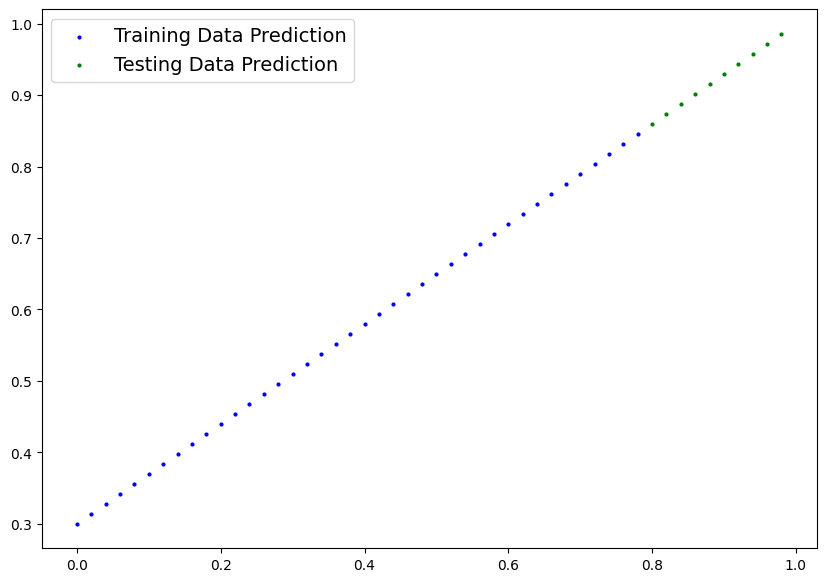

In [ ]:
plot_prediction()

## Saving and loading the model

In [ ]:
from pathlib import Path

# Create the model's path
model_path = Path("models")
model_path.mkdir(parents= True, exist_ok= True)

# creating model save path
model_name = "02_Pytorch Workflow_model_1.pth"
model_save_name = model_path / model_name

print(f"Saving the model in location {model_save_name}")
# saving it
torch.save(obj= model_1.state_dict(), f= model_path/model_name)

Saving the model in location models/02_Pytorch Workflow_model_1.pth


## Load the model

In [ ]:
loaded_model_1 = LinearRegression1V2()
print(loaded_model_1.state_dict())
loaded_model_1.load_state_dict(torch.load(f=model_path/model_name))
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.2191]])), ('linear_layer.bias', tensor([0.2018]))])


<ipython-input-79-86d911726a0f>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(f=model_path/model_name))


OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])